In [ ]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Add a color dimension to the images in "train" and "validate" dataset to
# leverage Keras's data augmentation utilities later.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
def create_model():
  model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [ ]:
#Data Augmentation to improve accuracy of model on user inputted data
datagen = keras.preprocessing.image.ImageDataGenerator(
  rotation_range=30,
  width_shift_range=0.25,
  height_shift_range=0.25,
  shear_range=0.25,
  zoom_range=0.2
)
# Generate augmented data from MNIST dataset
train_generator = datagen.flow(train_images, train_labels)
test_generator = datagen.flow(test_images, test_labels)

In [ ]:
imp_model = create_model()
history=imp_model.fit(train_generator, epochs=20, validation_data=test_generator)

Epoch 1/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.9452 - accuracy: 0.6802 - val_loss: 0.2246 - val_accuracy: 0.9299
Epoch 2/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2481 - accuracy: 0.9231 - val_loss: 0.1667 - val_accuracy: 0.9473
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1875 - accuracy: 0.9412 - val_loss: 0.1313 - val_accuracy: 0.9568
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1593 - accuracy: 0.9503 - val_loss: 0.1289 - val_accuracy: 0.9596
Epoch 5/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1375 - accuracy: 0.9571 - val_loss: 0.1264 - val_accuracy: 0.9597
Epoch 6/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1371 - accuracy: 0.9570 - val_loss: 0.1033 - val_accuracy: 0.9697
Epoch 7/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1149 - accuracy: 0.9640 - val_loss: 0.0901 -

In [ ]:
print(imp_model.summary())
print(history.history)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               1982720   
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

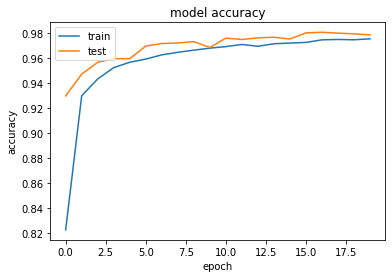

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

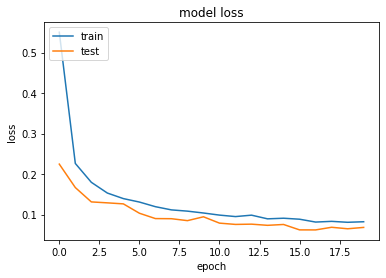

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
imp_model.save('/content/drive/MyDrive/cnnmodel1')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/cnnmodel1/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/cnnmodel1')

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


# Normalize the input image so that each pixel value is between 0 to 1.
train_images = train_images / 255.0
test_images = test_images / 255.0
print (train_images.shape)
# Add a color dimension to the images in "train" and "validate" dataset to
# leverage Keras's data augmentation utilities later.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)
print(train_images.shape)

(60000, 28, 28)
(60000, 28, 28, 1)


In [ ]:

new_model.evaluate(test_images,test_labels)

313/313 [==============================] - 33s 3ms/step - loss: 0.0325 - accuracy: 0.9889


[0.03253009170293808, 0.9889000058174133]

hence, we see that our model performs pretty well on non-augmented images also.

In [ ]:
#saving model in js format so that it can be used in a webpage
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(new_model, 'cnnmodeljs')
